In [1]:
import sys

In [2]:
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from wordcloud import WordCloud

In [5]:
from konlpy.tag import Okt
import re

In [13]:
print('\n'.join(sys.path))

C:\Users\admin\Desktop\data-science
C:\Users\admin\Anaconda3\python37.zip
C:\Users\admin\Anaconda3\DLLs
C:\Users\admin\Anaconda3\lib
C:\Users\admin\Anaconda3

C:\Users\admin\Anaconda3\lib\site-packages
C:\Users\admin\Anaconda3\lib\site-packages\win32
C:\Users\admin\Anaconda3\lib\site-packages\win32\lib
C:\Users\admin\Anaconda3\lib\site-packages\Pythonwin
C:\Users\admin\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\admin\.ipython


In [6]:
text_data = pd.read_csv('C:\data-science\ChatbotData.csv',
                       header = 0, sep = ',')
text_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [9]:
len(text_data.loc[0,'A'])

10

In [10]:
text_data.loc[0,'A']

'하루가 또 가네요.'

In [7]:
okt=Okt()
answer_words = okt.morphs(text_data['A'][0])
print(answer_words)

['하루', '가', '또', '가네요', '.']


In [12]:
print('전체 데이터의 개수 : {}'.format(len(text_data)))

전체 데이터의 개수 : 11823


### 형태소 분석


형태소 분석  
konlpy 설치 가이드  
https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/  
https://liveyourit.tistory.com/56  
https://data-scientist-brian-kim.tistory.com/79

In [16]:
answer = re.sub("[^가-힣\\s]", " ", text_data['A'][0])
print(answer)

하루가 또 가네요 


[형태소 분석 : morph() / nouns() / pos()]

In [17]:
okt.morphs(text_data['A'][0])

['하루', '가', '또', '가네요', '.']

In [18]:
okt.nouns(text_data['A'][0])

['하루', '또']

In [19]:
okt.pos(text_data['A'][0])

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation')]

In [20]:
okt.pos(text_data['A'][0] + 'aa' + 'ㅋㅋ')

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation'),
 ('aa', 'Alpha'),
 ('ㅋㅋ', 'KoreanParticle')]

In [21]:
[word for word, pos in okt.pos(text_data['A'][0] + 'aa' + 'ㅋㅋ') \
if pos == 'Noun']

['하루', '또']

In [22]:
nouns = []
verbs = []

for word, pos in okt.pos(text_data['A'][0] + 'aa' + 'ㅋㅋ'):
    if pos == 'Noun':
        nouns.append(word)
    elif pos == 'Verb':
        verbs.append(word)
nouns

['하루', '또']

In [23]:
verbs

['가네요']

In [24]:
nouns + verbs

['하루', '또', '가네요']

In [25]:
pos_data = [okt.pos(word) for word in text_data['A']]

In [26]:
pos_data

[[('하루', 'Noun'),
  ('가', 'Josa'),
  ('또', 'Noun'),
  ('가네요', 'Verb'),
  ('.', 'Punctuation')],
 [('위로', 'Noun'), ('해', 'Verb'), ('드립니다', 'Verb'), ('.', 'Punctuation')],
 [('여행', 'Noun'),
  ('은', 'Josa'),
  ('언제나', 'Adverb'),
  ('좋죠', 'Adjective'),
  ('.', 'Punctuation')],
 [('여행', 'Noun'),
  ('은', 'Josa'),
  ('언제나', 'Adverb'),
  ('좋죠', 'Adjective'),
  ('.', 'Punctuation')],
 [('눈살', 'Noun'), ('이', 'Josa'), ('찌푸려지죠', 'Verb'), ('.', 'Punctuation')],
 [('다시', 'Noun'),
  ('새로', 'Adjective'),
  ('사는', 'Verb'),
  ('게', 'Noun'),
  ('마음', 'Noun'),
  ('편해요', 'Adjective'),
  ('.', 'Punctuation')],
 [('다시', 'Noun'),
  ('새로', 'Adjective'),
  ('사는', 'Verb'),
  ('게', 'Noun'),
  ('마음', 'Noun'),
  ('편해요', 'Adjective'),
  ('.', 'Punctuation')],
 [('잘', 'Verb'),
  ('모르고', 'Verb'),
  ('있을', 'Adjective'),
  ('수도', 'Noun'),
  ('있어요', 'Adjective'),
  ('.', 'Punctuation')],
 [('시간', 'Noun'),
  ('을', 'Josa'),
  ('정', 'Noun'),
  ('하고', 'Josa'),
  ('해보세요', 'Verb'),
  ('.', 'Punctuation')],
 [('시간', 'Noun'),
  

1차원 합치기 ; 빈도수 등을 볼 수 있다.

In [27]:
pos_data_temp = np.sum(pos_data)

In [28]:
pos_data_temp[:10]

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation'),
 ('위로', 'Noun'),
 ('해', 'Verb'),
 ('드립니다', 'Verb'),
 ('.', 'Punctuation'),
 ('여행', 'Noun')]

In [29]:
pos_data_nouns = [word for word, _ in pos_data_temp if _ == 'Noun']
pos_data_nouns

['하루',
 '또',
 '위로',
 '여행',
 '여행',
 '눈살',
 '다시',
 '게',
 '마음',
 '다시',
 '게',
 '마음',
 '수도',
 '시간',
 '정',
 '시간',
 '정',
 '자랑',
 '자리',
 '요',
 '그',
 '사람',
 '거',
 '그',
 '사람',
 '거',
 '혼자',
 '돈',
 '다시',
 '거',
 '땀',
 '어서',
 '출발',
 '집',
 '집',
 '다음',
 '달',
 '더',
 '절약',
 '다음',
 '달',
 '더',
 '절약',
 '가장',
 '시간',
 '오늘이',
 '어제',
 '내일',
 '고민',
 '시간',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '더',
 '기회',
 '도',
 '이야기',
 '시간',
 '이야기',
 '시간',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '생각',
 '더',
 '기회',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '생각',
 '정말',
 '후회',
 '습관',
 '결정',
 '리지',
 '선생님',
 '기관',
 '연락',
 '감정',
 '그',
 '자체',
 '득템',
 '휴식',
 '단',
 '두',
 '개',
 '진리',
 '단',
 '두',
 '개',
 '진리',
 '저',
 '가세',
 '가세',
 '병원',
 '가세',
 '때',
 '게',
 '때',
 '게',
 '때',
 '게',
 '관리',
 '병원',
 '가세',
 '병원',
 '가세',
 '저',
 '자신',
 '더',
 '사랑',
 '

In [30]:
pos_data_nouns_len_2 = [word for word in pos_data_nouns\
                        if len(word) >= 2]

In [31]:
pos_data_nouns_len_2[:10]

['하루', '위로', '여행', '여행', '눈살', '다시', '마음', '다시', '마음', '수도']

In [32]:
wordcloud = WordCloud(font_path = 'C:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(pos_data_nouns_len_2))

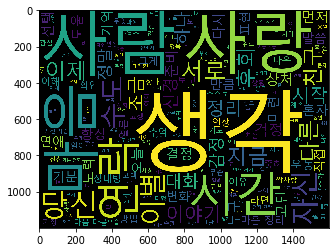

In [33]:
plt.figure()
plt.imshow(wordcloud)
plt.show()

In [34]:
from PIL import Image

In [35]:
mask = np.array(Image.open('korea.jpg'))

In [36]:
mask.shape

(2560, 1664, 3)

In [37]:
wordcloud2 = WordCloud(font_path = 'C:/windows/fonts/malgun.ttf',
                       colormap = 'viridis', 
                       background_color = 'white',
                       mask = mask).\
generate(' '.join(pos_data_nouns_len_2))


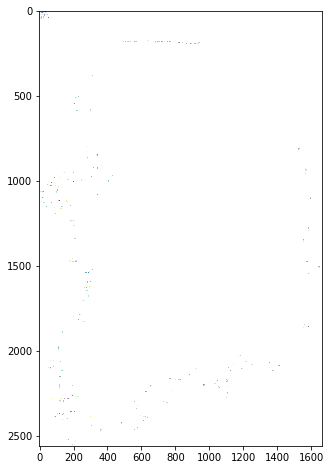

In [38]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud2)
plt.show()

In [39]:
mask2 = np.array(Image.open('italy.png'))

In [40]:
mask2.shape

(490, 465, 3)

In [41]:
wordcloud3 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     colormap = 'viridis', background_color='white',
                      mask = mask2,
                      width = 1600, height = 1200).\
generate(' '.join(pos_data_nouns_len_2))

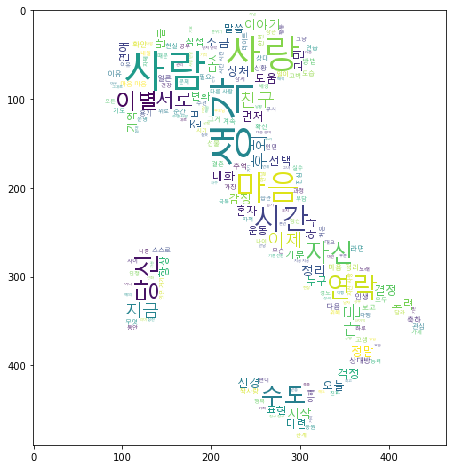

In [42]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud3)
plt.show()

---

In [43]:
data = pd.read_csv('C:\data-science\seoul.txt',
                  sep = '\t',
                  engine = 'python',
                  encoding = 'UTF-8',
                  header = None)

In [46]:
data.columns = ['A']

In [47]:
data

,A
0,3082 박원순 시장님께 2018-03-2751
1,3081 장위7구역 재개발 현금청산자 딸입니다... 2018-03-2711
2,3080 미세먼지에 대하여 2018-03-2615
3,"3079 목동 1,2,3단지 환원 2018-03-2617"
4,3078 강동구 둔촌주공아파트 재건축 관련 안... 2018-03-269
...,...
105,2977 서울시는 성수전략정비구역의 결정고시를... 2018-03-205
106,2976 이슬람기도원 건축에 대해 재차 민원드... 2018-03-2033
107,2975 세금 2억으로 특정종교 기도실을 설치... 2018-03-2029
108,2974 이슬람 기도실이 말입니까???? 2018-03-2053


In [48]:
data.A[109][5:-12]

'양천구 목동 123단지 종상향 요청'

In [49]:
data.A[109][-12:]

' 2018-03-203'

In [50]:
data.A[4][5:(data.A[4].index('2018-')-1)]

'강동구 둔촌주공아파트 재건축 관련 안...'

In [51]:
data.A[0][5:(data.A[0].index('2018-')-1)]

'박원순 시장님께'

In [52]:
len(data.A[4]) - data.A[4].index('2018-') + 1

12

In [53]:
data_temp = []
for i in range(0,110):
    data_temp.append(data.A[i][5:(data.A[i].index('2018-')-1)])

In [54]:
data_temp

['박원순 시장님께',
 '장위7구역 재개발 현금청산자 딸입니다...',
 '미세먼지에 대하여',
 '목동 1,2,3단지 환원',
 '강동구 둔촌주공아파트 재건축 관련 안...',
 '성수4지구 건축심의 관련 정정 보도자...',
 '미세먼지 대안을 제안합니다',
 '서울 개인택시 주 5일 근무제 제안과...',
 '성수전략정비구역 사업지연 사유 확인',
 '개포주공1단지아파트 이주기간이내 조기...',
 '시장님 억울함을 해소해주셔요',
 '성수전략정비구역 4지구 건축심의 정정...',
 '수색을 관문개발하는데 철도물류기지 한...',
 '서울시장님은 목동1.2.3단지 종환원...',
 '시.구합동보고회',
 '시장님 , 목동 주민대표와의 만남. ...',
 '목동1-3단지 종환원 문제 해결하여주...',
 '조건없는 목동123단지3종환',
 '조건없는목동123단지3종환',
 '목동 3종환원',
 '3월 30일 목동주민대표를 만나주십시...',
 '3월 30일 박원순 시장님 뵙고 싶습...',
 '목동123단지 3종환원 시구합동보고회',
 '목동123단지 3종환원',
 '목동 123단지 종환원 촉구합니다.',
 '목동123단지 3종환원',
 '목동123단지 주민 시장님면담요청',
 '안정성이 검토되지 않은 서서울고속도로...',
 '목동1-3단지 주민은 특혜를 바라는것...',
 '빠른 시구합동보고회를 촉구합니다',
 '3종환원을위한 시구합동보고회를 3월안...',
 '조건없는 목동123단지 3종환.',
 '조건없는 목동123단지 3종환',
 '시장님 만나주세요.우리의대표분들',
 '목동123단지 입주자대표 면담요청의 ...',
 '박원순 시장은 강북 재개발을 막지 마...',
 '한강낚시',
 '서울주택도시공사의 도시개발행위를 서울...',
 '목동1~3단지 주민대표단을 만나주세요',
 '목동1~3단지 주민대표단을 만나주세요',
 '이슬람 기도실 반대입니다.',
 '박원순 시장님. 목동1-3단지 주민대...',
 '시장님! 목동 주민을 만나주십시요',
 '

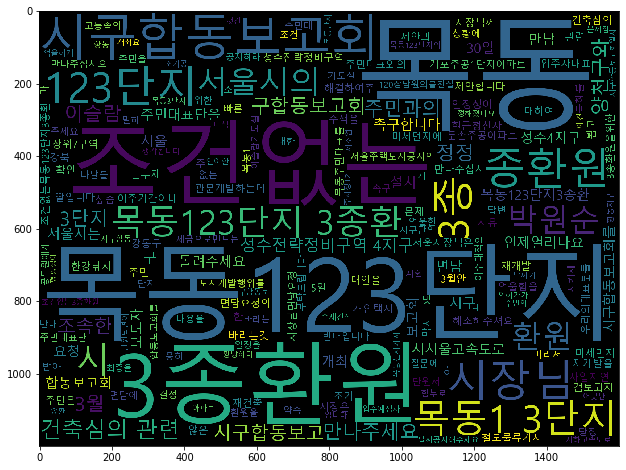

In [55]:
wordcloud_seoul = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(data_temp))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud_seoul)
plt.show()

In [56]:
data_table = pd.DataFrame(columns = ['A'])
for i in range(0,110):
    data_table.loc[i] = (data.A[i][5:(data.A[i].index('2018-')-1)])

In [57]:
data_pos = [okt.pos(word) for word in data_table['A']]

In [58]:
data_pos_temp = np.sum(data_pos)


In [59]:

data_pos_nouns = [word for word, _ in data_pos_temp if _ == 'Noun']

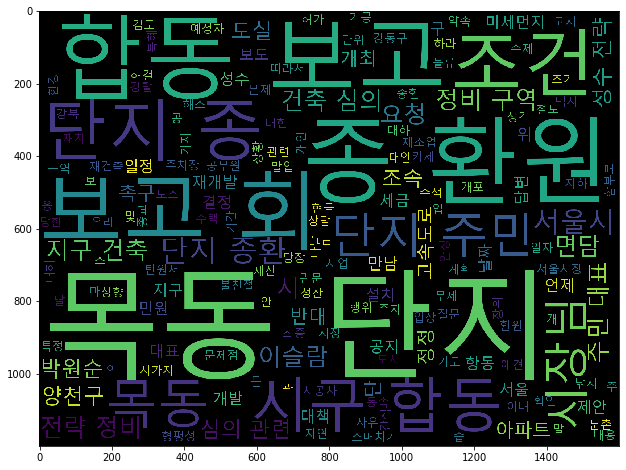

In [60]:
wordcloud_seoul2 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(data_pos_nouns))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud_seoul2)
plt.show()